<a href="https://colab.research.google.com/github/HayateSato/DS_Practice/blob/main/2nd_Evaluation_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 0: install libraries

In [ ]:
# pip install transformers datasets kagglehub

In [ ]:
from transformers import pipeline
from datasets import load_dataset
import matplotlib.pyplot as plt
import kagglehub

# STEP 1: download the dataset  

### 1-1 About dataset
- Name: Age Detection - Object Detection dataset
- Content: Human face (taken by selfies) of male and female between 18-60 years old
- Label: 5 Age groups (18-20 | 21-30 | 31-40 | 41-50 | 51-60)
- Size: 150 images
- Source: Kaggle

In [ ]:
# Download latest version
ds_path = kagglehub.dataset_download("trainingdatapro/age-detection-human-faces-18-60-years")

print("Path to dataset files:", ds_path)

Path to dataset files: /root/.cache/kagglehub/datasets/trainingdatapro/age-detection-human-faces-18-60-years/versions/1


loading the dataset

In [ ]:
dataset = load_dataset(ds_path)

Resolving data files:   0%|          | 0/125 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/25 [00:00<?, ?it/s]

# STEP 2: Data Understanding

### 2-1 summary of the dataset

- contains two folders, train and test
- each has image and corresponding label
- the split ratio is 1:6

In [ ]:
print("Dataset structure:\n", dataset)

Dataset structure:
 DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 125
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 25
    })
})


### 2-2 Schema of the dataset
- iamge and corresponding age group

In [ ]:
print("\nDataset features:\n", dataset['train'].features)


Dataset features:
 {'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['18-20', '21-30', '31-40', '41-50', '51-60'], id=None)}


### 2-3 Closer look into each dataset (train and test)

- label 0 means the person is between 18-20yo, label 4 means the person is 51-60yo
- train dataset includes 125, 25 images from each age group
- test dataset includes 25, 5 images from each age group

In [ ]:
from collections import Counter

# Get label names (age ranges)
label_names = dataset['train'].features['label'].names

# Looping through dataset by split (e.g., 'train', 'test')
for split in dataset:
    ds = dataset[split]

    # Counting the total number of images in each split
    print(f"Images in {split} dataset: {len(ds)}")
    print("The number of images per age group is:")

    # Counting occurrences of each label in the dataset
    labels = [row['label'] for row in ds]
    label_distribution = Counter(labels)

    # Iterating through the label distribution
    for label_value, count in label_distribution.items():
        age_range = label_names[label_value]  # Map numeric label to age range
        print(f"Label {label_value} ({age_range} years old): {count}")

    print("\n")

Images in train dataset: 125
The number of images per age group is:
Label 0 (18-20 years old): 25
Label 1 (21-30 years old): 25
Label 2 (31-40 years old): 25
Label 3 (41-50 years old): 25
Label 4 (51-60 years old): 25


Images in test dataset: 25
The number of images per age group is:
Label 0 (18-20 years old): 5
Label 1 (21-30 years old): 5
Label 2 (31-40 years old): 5
Label 3 (41-50 years old): 5
Label 4 (51-60 years old): 5




### 2-4 Information  of first record

In [ ]:
print("First sample:", dataset['train'][0])

First sample: {'image': <PIL.Image.Image image mode=RGB size=1936x2592 at 0x7F4728F6CED0>, 'label': 0}


the image in the first row is labeled as 0, meaning age between 18-20 years old

### 2-5 Samples of the dataset

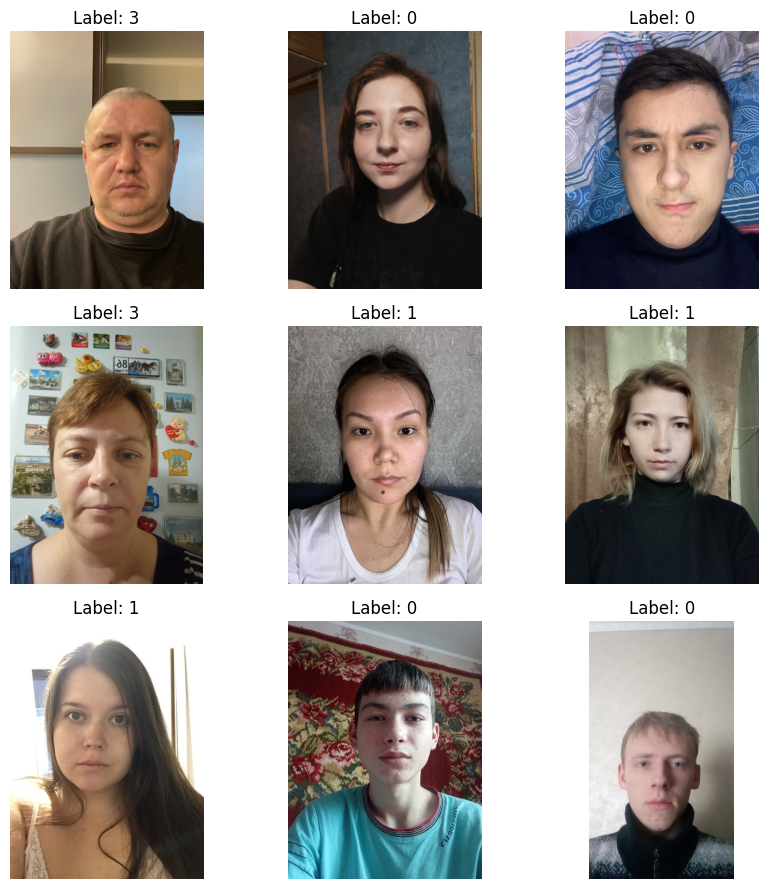

In [ ]:
import random

# Set the random seed
random.seed(42)

# Select 6 random indices from the dataset
random_indices = random.sample(range(len(dataset['train'])), 9)

# Create a figure and subplots with 3 columns
fig, axes = plt.subplots(3, 3, figsize=(9, 9))  # 2 rows, 3 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Display images in the subplots
for i, idx in enumerate(random_indices):
    example = dataset['train'][idx]
    image = example['image']
    label = example['label']

    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# STEP 3: Loading the pre-trained model

In [ ]:
# Load the image-classification pipeline
pipe = pipeline("image-classification", model="nateraw/vit-age-classifier")

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


# STEP 4: Fine-Tuning (Skipped)

No fine-tuning as specified by the requirement for this assignement

# STEP 5: Prediction

### 5-1 Feeding the model through pipline

In [ ]:
# Batch processing
random_images = [dataset['train'][i]['image'] for i in random_indices]
random_predictions = pipe(random_images)

### 5-2 Sowing the prediction reuslt

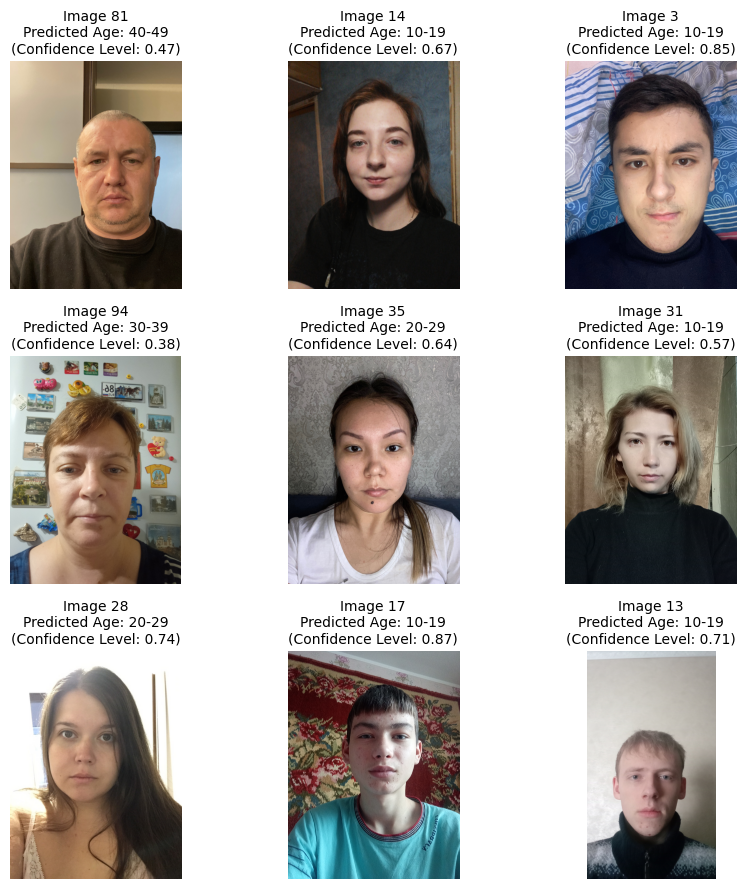

In [ ]:
import matplotlib.pyplot as plt
import math

predicted_age_groups = []
confidence_levels = []

# Define grid layout (3 columns)
num_images = len(random_images)
num_cols = 3
num_rows = 3
# num_rows = math.ceil(num_images / num_cols)  # Calculate required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 9))
axes = axes.flatten()  # Flatten in case of single row/column

# Show each image with predictions
for i, (img, pred) in enumerate(zip(random_images, random_predictions)):
    # Find the result with the highest score
    best_result = max(pred, key=lambda x: x['score'])  # Get the prediction with max score
    best_label = best_result['label']
    best_score = best_result['score']

    # Append only the best label and its score
    predicted_age_groups.append(best_label)
    confidence_levels.append(best_score)

    # Display image in the subplot
    axes[i].imshow(img)
    axes[i].set_title(f"Image {random_indices[i]}\nPredicted Age: {best_label}\n(Confidence Level: {best_score:.2f})", fontsize=10)
    axes[i].axis('off')

# Hide unused subplots (in case total images % 3 != 0)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### 5-3 Comparing with actual age

Composing a list of actual label and age group

In [ ]:
image_number = []
actual_age_label = []
actual_age_group = []

for idx in random_indices:
    example = dataset['train'][idx]
    label = example['label']
    image_number.append(idx)
    actual_age_label.append(label)
    actual_age_group.append(label_names[label])

Forming a dataframe for comparison/evaluation

In [ ]:
import pandas as pd
comparison = pd.DataFrame({
    'image_number':image_number,
    'actual_age_label': actual_age_label,
    'actual_age_group': actual_age_group,
    'predicted_age_group':predicted_age_groups,
    'confidence_level': confidence_levels
    })

comparison

,image_number,actual_age_label,actual_age_group,predicted_age_group,confidence_level
0,81,3,41-50,40-49,0.466644
1,14,0,18-20,10-19,0.672367
2,3,0,18-20,10-19,0.850564
3,94,3,41-50,30-39,0.378181
4,35,1,21-30,20-29,0.640273
5,31,1,21-30,10-19,0.573157
6,28,1,21-30,20-29,0.742194
7,17,0,18-20,10-19,0.867371
8,13,0,18-20,10-19,0.712339


# STEP 6: Conclusion

- In some pictures the age range was predicted correctly (image number 81|14|3|35|28|17|17)
- Howerver some rediction was slightly off (Image number 94|31)  
- The partial reason of slightly off prediction is because of the label. Age group is formed differently in the kaggle dataset and the dataset that was used for this model to be trained.
- Overall, with fine-tuning or re-formation of age group, it will improve the prediction.

converting to HTML

In [ ]:
# %%shell
# jupyter nbconvert --to html /content/notebook.ipynb

In [ ]:
# !jupyter nbconvert --to html /content/2nd_Evaluation_Exercise_HayateSato.ipynb